In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#import dataset 
df = pd.read_csv('advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [5]:
df.shape

(200, 4)

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
#avg expense spent is highest on tv
#avg expense spent is lowest on radio

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

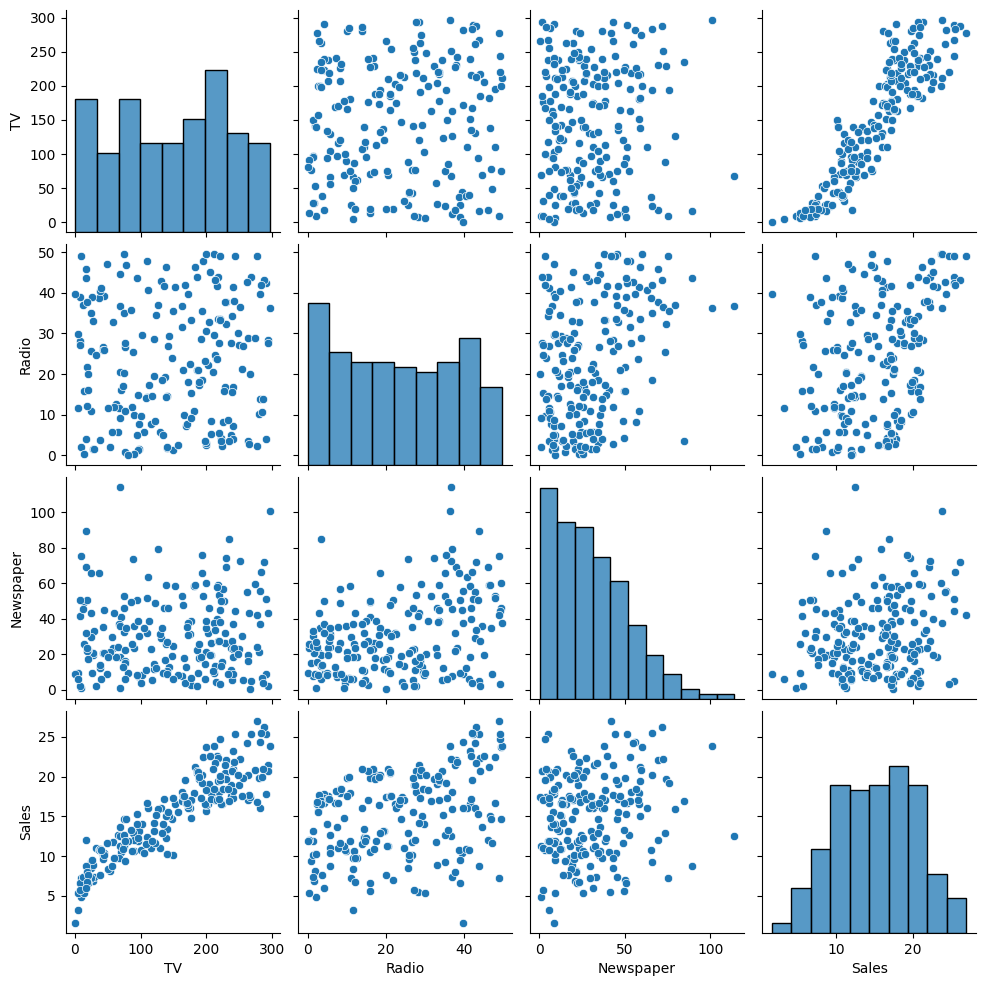

In [8]:
sns.pairplot(df[['TV', 'Radio', 'Newspaper', 'Sales']])
plt.show()

<Axes: ylabel='Frequency'>

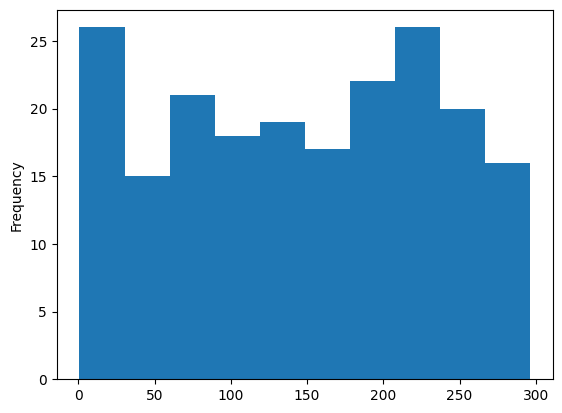

In [9]:
df['TV'].plot.hist(bins=10)

<Axes: xlabel='Radio', ylabel='Frequency'>

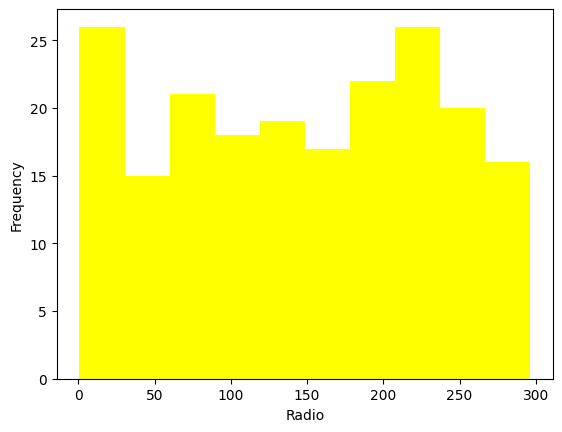

In [10]:
df['TV'].plot.hist(bins=10,color='yellow',xlabel='Radio')


<Axes: xlabel='Newspaper', ylabel='Frequency'>

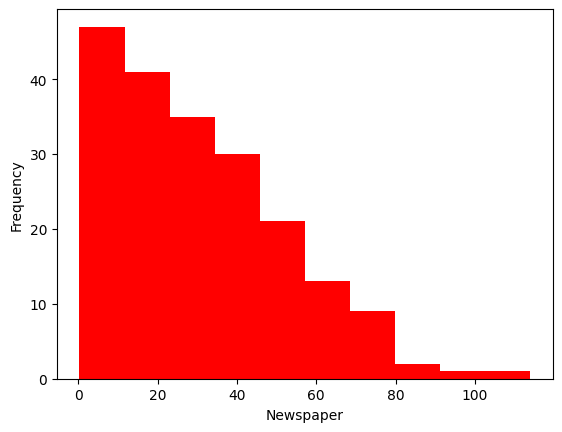

In [11]:
df['Newspaper'].plot.hist(bins=10,color='Red',xlabel='Newspaper')


In [12]:
#Histogram Observation
#The majority sales is the result of low  advertising 

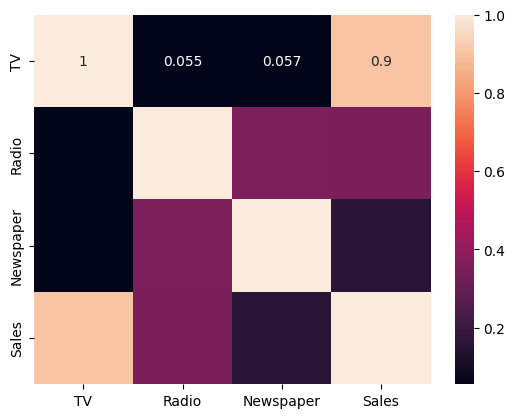

In [13]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [14]:
#SALES IS HIGHLY COORELATED WITH TV

In [19]:
from sklearn.model_selection import train_test_split

# Define features and target
x= df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Ensure the same split for X and y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Check the shape of the splits
print(f"X_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (160, 3)
y_train shape: (160,)
X_test shape: (40, 3)
y_test shape: (40,)


In [20]:
# Reset the index of the dataframe
df = df.reset_index(drop=True)

# Now redefine X and y
x = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']


In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [22]:
y_pred = model.predict(x_test)
y_pred

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

In [23]:
print(y_test)


95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    16.5
45     16.1
66     11.0
182     8.7
165    16.9
78      5.3
186    10.3
177    16.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65     11.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      15.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: Sales, dtype: float64


In [24]:
# Calculate evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [25]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 1.2748262109549338
Mean Squared Error (MSE): 2.9077569102710905
Root Mean Squared Error (RMSE): 1.7052146229349228
R-squared (R²): 0.9059011844150826


In [ ]:
#R² score of 0.90 indicates that the model explains 90% of the variance in sales, which suggests that the model is performing well.

In [33]:
# Ridge Regression
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
ridge_params = {'alpha': [0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5)
ridge_grid.fit(x_train, y_train)
ridge_best = ridge_grid.best_estimator_


In [34]:
lasso = Lasso()
lasso_params = {'alpha': [0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5)
lasso_grid.fit(X_train, y_train)
lasso_best = lasso_grid.best_estimator_

In [36]:
ridge_pred = ridge_best.predict(x_test)
lasso_pred = lasso_best.predict(x_test)

In [41]:
# Calculate RMSE for both
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
print(f'Ridge RMSE: {ridge_rmse}')
print(f'Lasso RMSE: {lasso_rmse}')

Ridge RMSE: 1.706366018416288
Lasso RMSE: 1.705673547896932


In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Hyperparameter tuning using GridSearchCV
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
rf_grid = GridSearchCV(rf, rf_params, cv=5, n_jobs=-1)
rf_grid.fit(x_train, y_train)

# Best estimator
rf_best = rf_grid.best_estimator_

# Evaluate Random Forest
rf_pred = rf_best.predict(x_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

print(f'Random Forest RMSE: {rf_rmse}')


Random Forest RMSE: 1.1868634935218914


In [42]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor
gb = GradientBoostingRegressor(random_state=42)

# Hyperparameter tuning for Gradient Boosting
gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 5, 7]
}
gb_grid = GridSearchCV(gb, gb_params, cv=5, n_jobs=-1)
gb_grid.fit(x_train, y_train)

# Best estimator
gb_best = gb_grid.best_estimator_

# Evaluate Gradient Boosting
gb_pred = gb_best.predict(x_test)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))

print(f'Gradient Boosting RMSE: {gb_rmse}')


Gradient Boosting RMSE: 1.3240220552052033


In [43]:
from sklearn.model_selection import cross_val_score

# Using 5-fold cross-validation for Ridge model
ridge_cv_scores = cross_val_score(ridge_best, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
ridge_cv_rmse = np.sqrt(-ridge_cv_scores)

print(f'Ridge CV RMSE: {ridge_cv_rmse.mean()}')


Ridge CV RMSE: 1.646048086518989


In [44]:
model.coef_

array([0.05450927, 0.10094536, 0.00433665])

In [45]:
model.intercept_

4.714126402214134

In [46]:
0.05548294*69.2+7.007108428241851

10.84652787624185

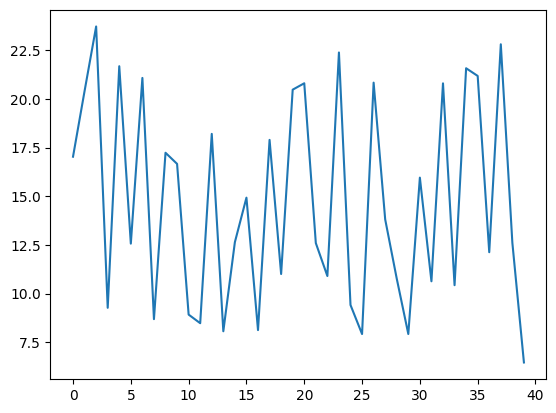

In [47]:
plt.plot(y_pred)

ValueError: x and y must be the same size

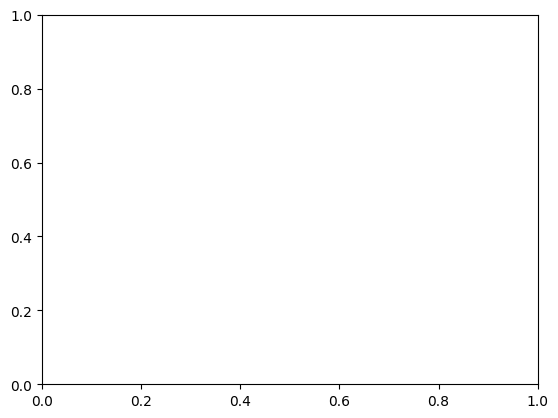

In [48]:
plt.scatter(x_test,y_test)
plt.plot(x_test, 7.007108428241851+0.05548294*x_test,'r')
plt.show()

In [ ]:
#CONCLUSION
#Above mentioned solution is succcessfully able to predict the sales using advertising dataset 